In [1]:
import sys
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
# from matplotlib.colors import LightSource, LogNorm
import numpy as np
import os
import h5py
import arepo_package.arepo_package as arepo_package
from astropy import constants as c
from astropy import units as u
from LtU_get_property import get_particle_property_LTU
import matplotlib as mpl
%matplotlib inline

In [2]:
Sim_folder = 'FF_Rainer' # 'Low_mass_FF_nofeedback_fewseeds'
output_folder= 'output' # 'FF_seed3.19_nofeedback_fewseeds'
basePath = f'{Sim_folder}/{output_folder}/'
Omega_baryon = 0.0486
h = 0.6774
d = 0.140 # kpc
SofteningMaxPhysType0 = 0.0625
SofteningComovingType0 = 0.125

In [3]:
header = arepo_package.load_snapshot_header(basePath,6)
boxsize = header['BoxSize']
DM_mass = header['MassTable'][1]
baryons_mass = 5 * Omega_baryon * DM_mass * 1e10/h # Solar masses, 5 times because that's what it turns out to be...
# print('Baryon mass:',baryons_mass)

Desired redshift:  6
Output redshift:  6.008768072993786
Output snapshot:  19
{'BoxSize': np.float64(12.5), 'MassTable': array([0.00000000e+00, 3.11418629e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00]), 'NumFilesPerSnapshot': np.int32(4), 'NumPart_ThisFile': array([111981290, 113414979,         0,         0,    110807,        93],
      dtype=uint64), 'NumPart_Total': array([447059545, 452984832,         0,         0,    466882,       396],
      dtype=uint64), 'Redshift': np.float64(6.008768072993786), 'Time': np.float64(0.14267842644889395)}


At redshift 15.0, 14 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 14.0, 64 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 13.0, 30 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 12.0, 94 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 11.0, 195 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 10.0, 312 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 9.0, 655 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 8.0, 17 are smaller than the softening length cubed, and 0 are smaller than 1/3 the softening length cubed
At redshift 7.0, 1755 are smaller than 

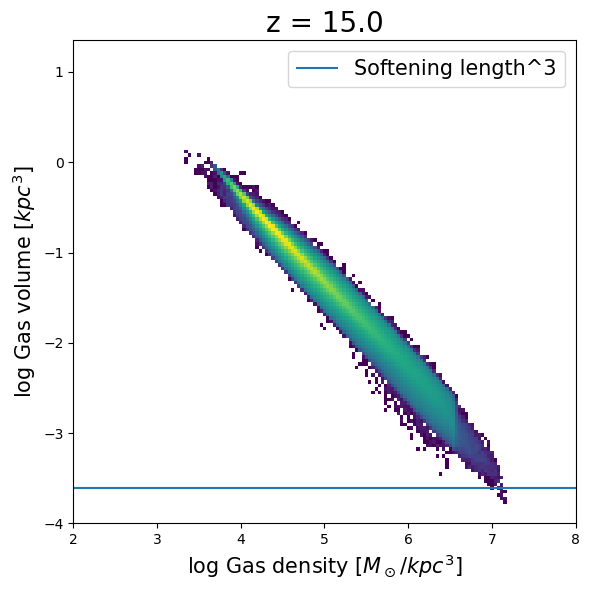

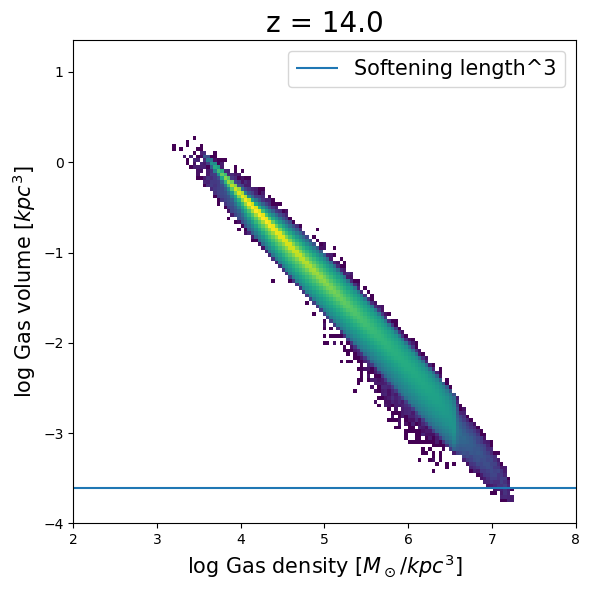

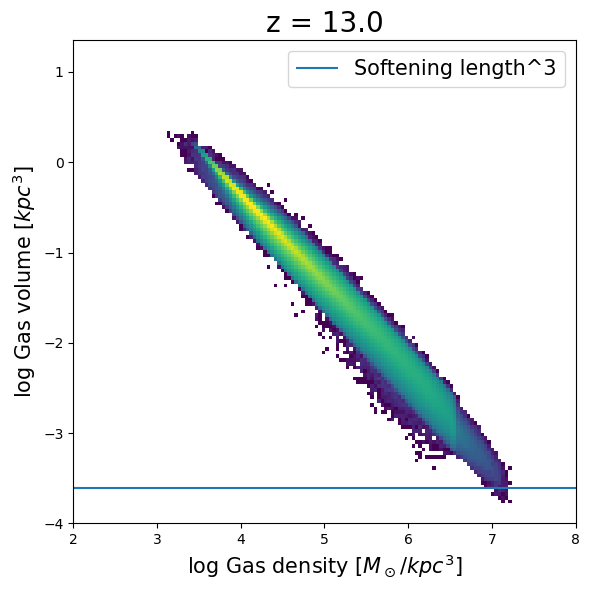

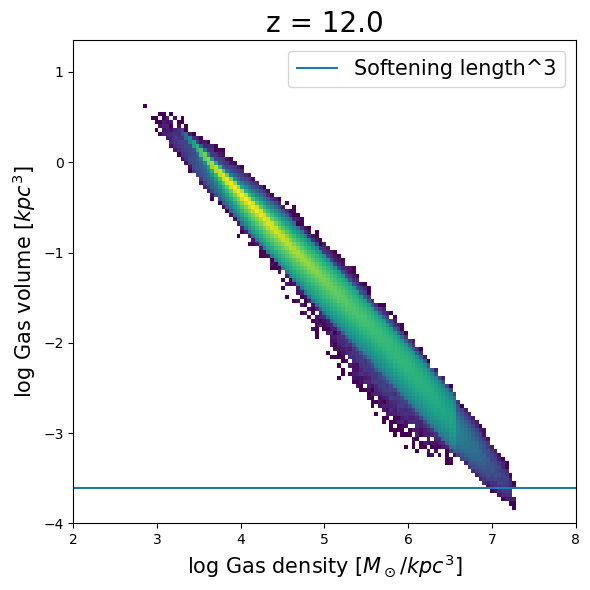

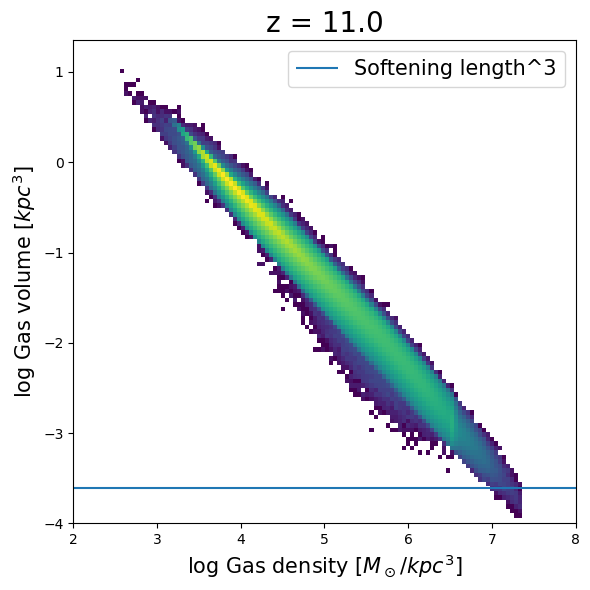

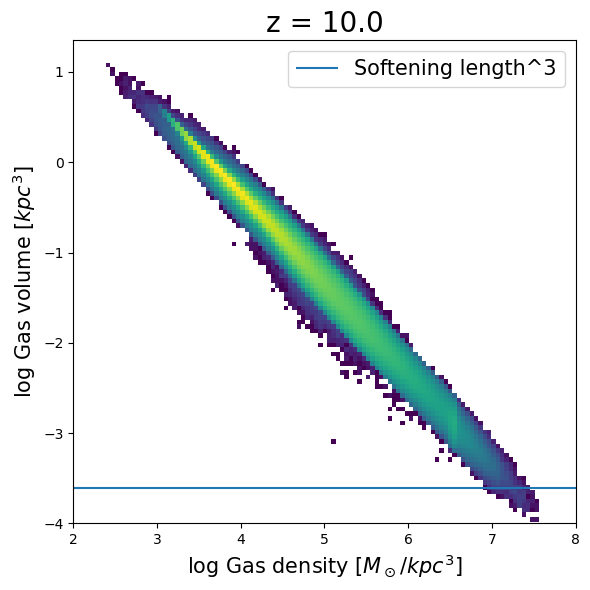

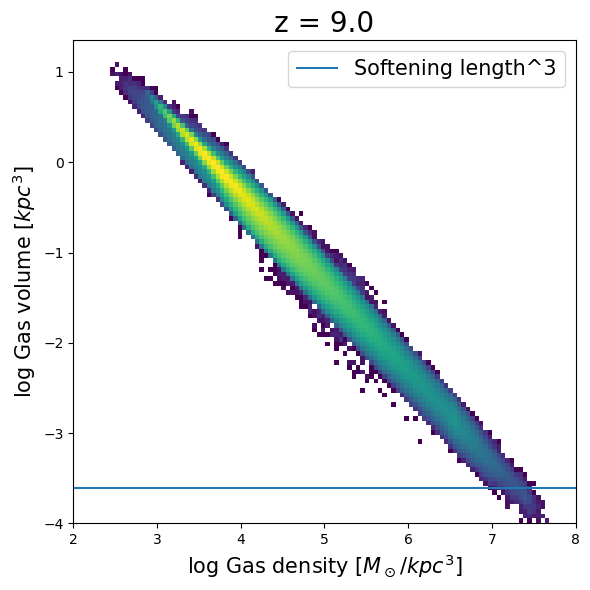

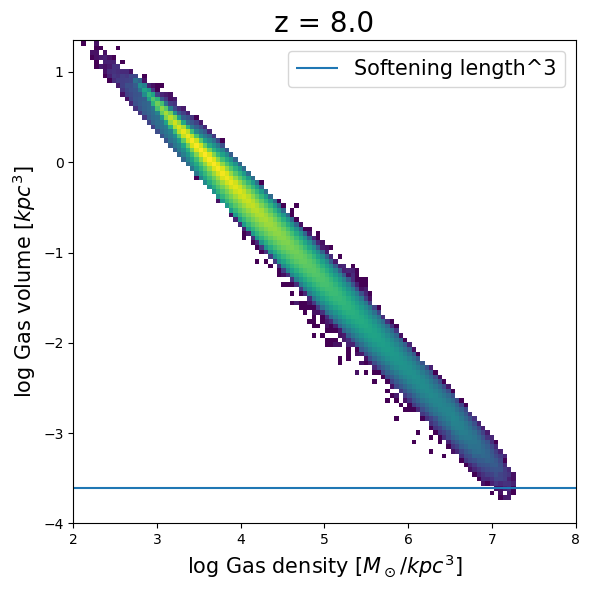

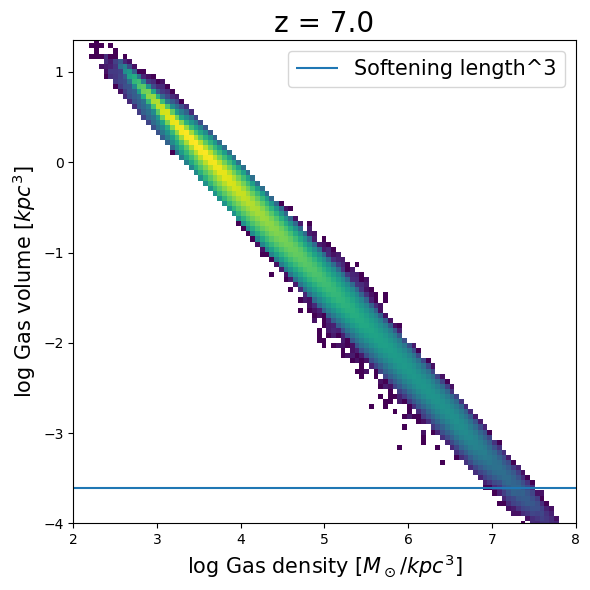

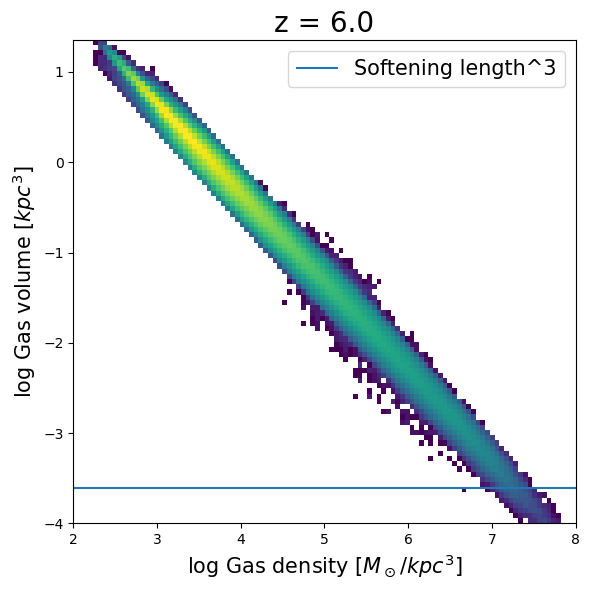

In [62]:
redshifts = np.linspace(12,5,8)
a = 1/(1 + redshifts)
# cmap = mpl.colormaps['viridis']

for i in range(len(redshifts)):
    Gas_Mass = get_particle_property_LTU(basePath,'Masses',p_type=0, desired_redshift = redshifts[i])
    Gas_rho = get_particle_property_LTU(basePath,'Density',p_type=0, desired_redshift = redshifts[i])
    
    Gas_Mass_Msun = Gas_Mass[0] * 1e10/h
    Gas_rho_Msun_kpc3 = Gas_rho[0] * 1e10/h/(a[i]/h)**3
    Gas_volume = Gas_Mass_Msun/Gas_rho_Msun_kpc3 # kpc^3
    N_cells = len(Gas_volume[Gas_volume < (SofteningMaxPhysType0**3)])
    N_cells3 = len(Gas_volume[Gas_volume < (SofteningMaxPhysType0**3)/3])
    
    print(f'At redshift {redshifts[i]}, {N_cells} are smaller than the softening length cubed, and {N_cells3} are smaller than 1/3 the softening length cubed')

    fig,axs = plt.subplots(figsize=(6,6))
    axs.hist2d(np.log10(Gas_rho_Msun_kpc3),np.log10(Gas_volume),bins=(100,100),norm='log')
    axs.hlines(np.log10(SofteningMaxPhysType0**3),2,8,label = 'Softening length^3')
    axs.set_ylabel(r'log Gas volume [$kpc^3$]',fontsize=15)
    axs.set_xlabel(r'log Gas density [$M_\odot/kpc^3$]',fontsize=15)
    axs.set_xlim(2,8)
    axs.set_ylim(-4,1.35)
    axs.legend(fontsize=15)
    axs.set_title(f'z = {redshifts[i]}',fontsize=20)
    # fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
    # fig.colorbar(image,ax=axs,label='Counts')
    fig.tight_layout()
    fig.savefig(f'{Simpath}/Plots/{Simpath}_gasvol_z{redshifts[i]}.png')

Gas density vs gas cell size

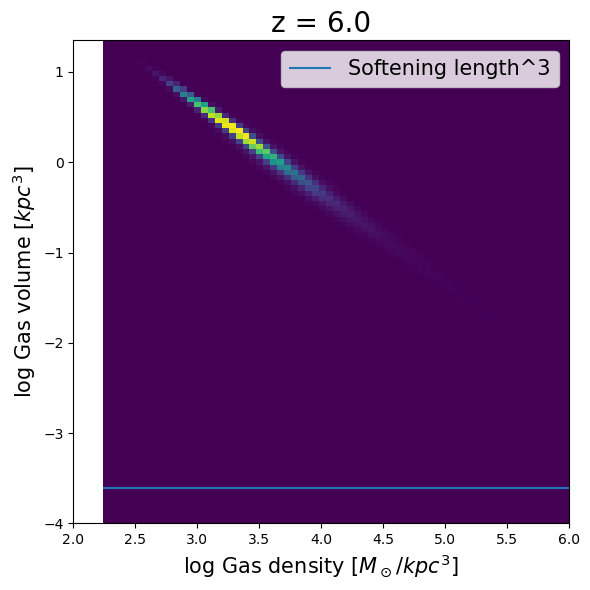

In [42]:
fig,axs = plt.subplots(figsize=(6,6))
axs.hist2d(np.log10(Gas_rho_Msun_kpc3),np.log10(Gas_volume),bins=(100,100),norm='log')
axs.hlines(np.log10(SofteningMaxPhysType0**3),np.min(np.log10(Gas_rho_Msun_kpc3)),np.max(np.log10(Gas_rho_Msun_kpc3)),label = 'Softening length^3')
axs.set_ylabel(r'log Gas volume [$kpc^3$]',fontsize=15)
axs.set_xlabel(r'log Gas density [$M_\odot/kpc^3$]',fontsize=15)
axs.set_xlim(2,6)
axs.set_ylim(-4,1.35)
axs.legend(fontsize=15)
axs.set_title(f'z = {redshifts[i]}',fontsize=20)

fig.tight_layout()
fig.savefig(f'Plots/{output_folder}_gasvol_z{redshifts[i]}.png')

Looping through redshifts
Loading in redshift 15.0
Loading in redshift 14.0
Loading in redshift 13.0
Loading in redshift 12.0
Loading in redshift 11.0
Loading in redshift 10.0
Loading in redshift 9.0
Loading in redshift 8.0
Loading in redshift 7.0
Loading in redshift 6.0


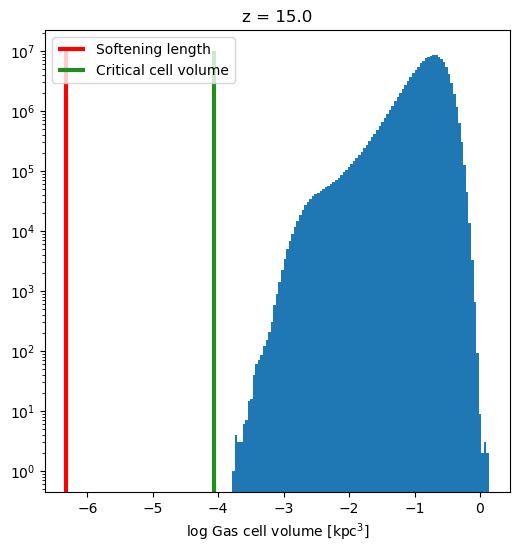

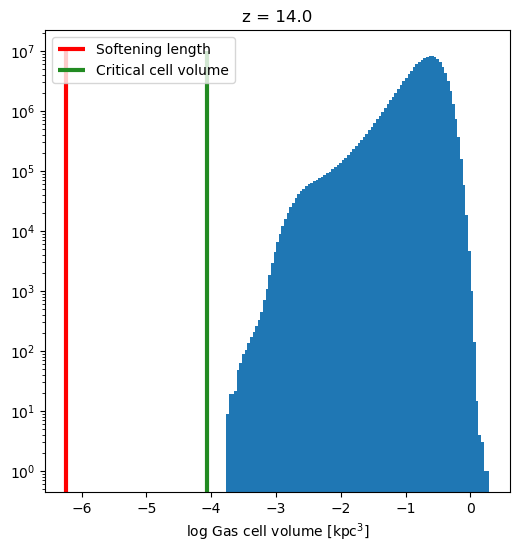

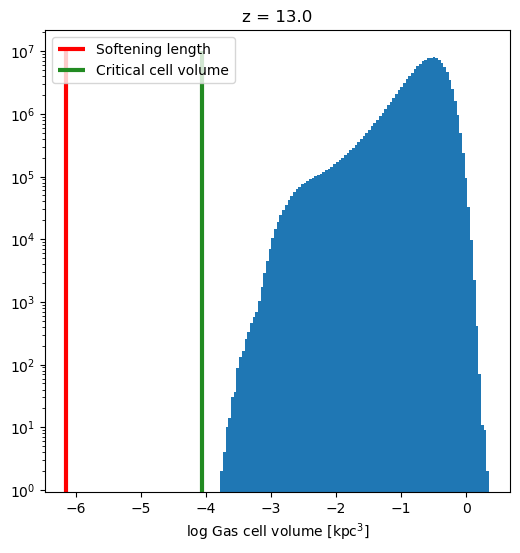

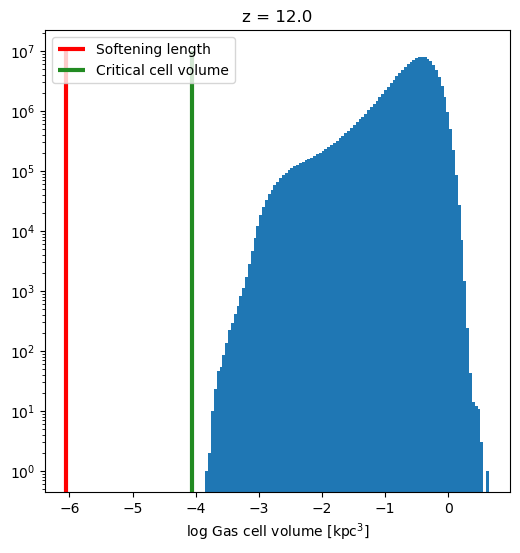

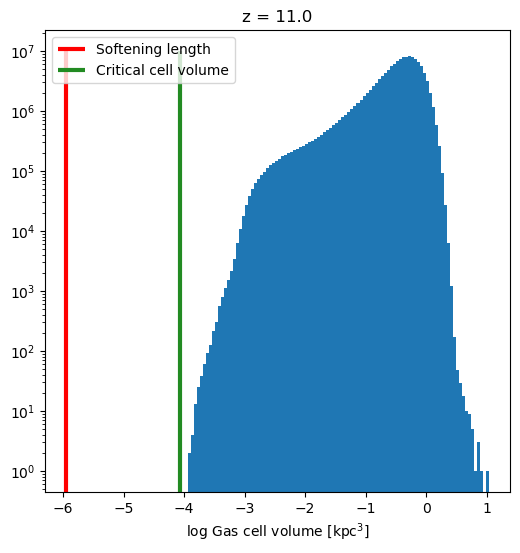

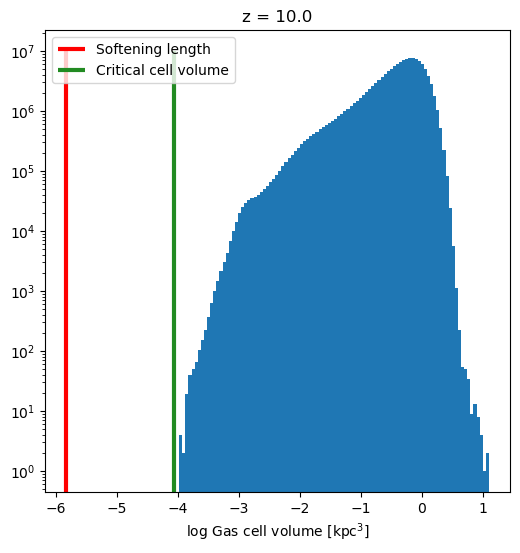

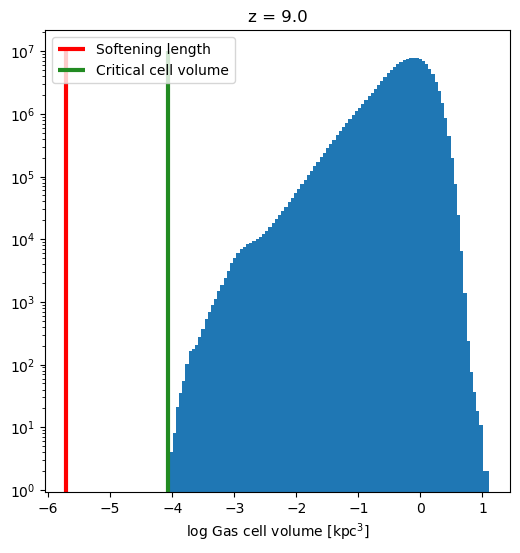

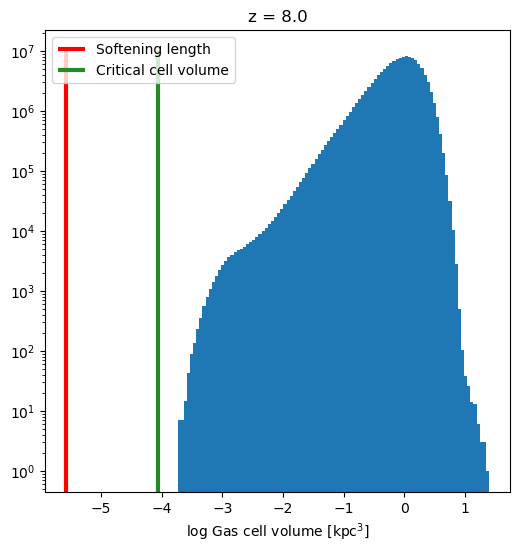

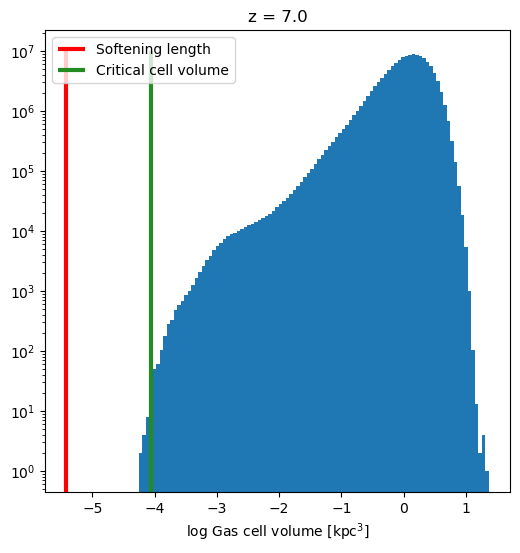

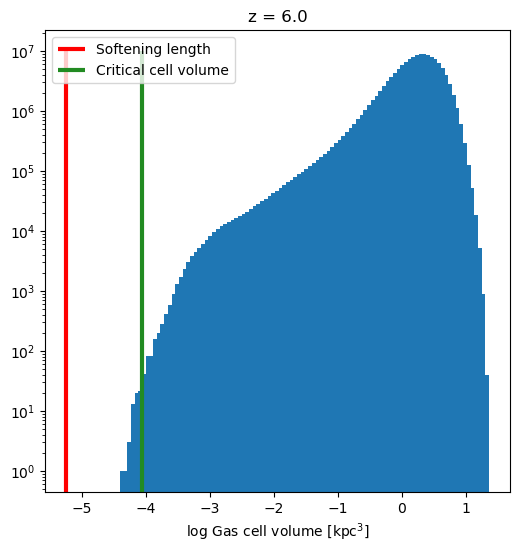

In [12]:
redshifts = np.linspace(15,6,10)
a = 1/(1 + redshifts)
print('Looping through redshifts')

for i in range(len(redshifts)):
    print(f'Loading in redshift {redshifts[i]}')
    Gas_Mass = get_particle_property_LTU(basePath,'Masses',p_type=0, desired_redshift = redshifts[i])
    Gas_rho = get_particle_property_LTU(basePath,'Density',p_type=0, desired_redshift = redshifts[i])
    
    Gas_Mass_Msun = Gas_Mass[0] * 1e10/h
    Gas_rho_Msun_kpc3 = Gas_rho[0] * 1e10/h/(a[i]/h)**3
    Gas_volume = Gas_Mass_Msun/Gas_rho_Msun_kpc3 # kpc^3

    fig,axs = plt.subplots(figsize=(6,6))

    axs.hist(np.log10(Gas_volume),bins=100)
    axs.vlines(np.log10((SofteningComovingType0*a[i])**3),0,1e7,color='red',label = 'Softening length',lw=3) # Adding scale factor here?
    axs.vlines(np.log10(crit_vol),0,1e7,color='forestgreen',label = 'Critical cell volume',lw=3)
    # plt.xlim(-0.01,12)
    axs.set_yscale('log')
    axs.set_xlabel(r'log Gas cell volume [$\rm kpc^3$]')
    axs.set_title(f'z = {redshifts[i]}')
    axs.legend()
    fig.savefig(f'Plots/{output_folder}_gasvolhist_z{redshifts[i]}.png')

# Density needed for specific accretion rate of 1

In [4]:
GAMMA=5./3
GAMMA_MINUS1=GAMMA-1
redshifts = np.linspace(15,6,10)
a = 1/(1+redshifts)
bondi_boost = 1
BH_seed_mass = 1e3

G = c.G.to(u.km**3/(u.Msun*u.s**2)).value
light_speed = c.c.to(u.km/u.s).value
kpc2km = u.kpc.to(u.km)
sec_per_Gyr = u.Gyr.to(u.s)

cells_per_soft = 3 # Shooting for an average of ~30 cells
gas_soft_max = 0.0625 # kpc
max_cells_in_d = np.floor((d / gas_soft_max)**3) * cells_per_soft # Number of gas cells we can fit in a sphere of size ~d^3
accretion_mass = max_cells_in_d*baryons_mass # Total mass within radius d of BH, in solar massses

print(f'Max # of cells: {max_cells_in_d}')

specific_accretion_ff = sec_per_Gyr*0.001 * np.sqrt(G/BH_seed_mass) * accretion_mass/(d*kpc2km)**(3/2)
specific_accretion_ff_mod = sec_per_Gyr*100*np.sqrt(2) * G/light_speed * accretion_mass/(d*kpc2km)**2 

print(f'Freefall specific accretion rate: {specific_accretion_ff} Msun/Gyr')
print(f'Modified freefall specific accretion rate: {specific_accretion_ff_mod} Msun/Gyr')

Max # of cells: 33.0
Freefall specific accretion rate: 0.2489574685830294 Msun/Gyr
Modified freefall specific accretion rate: 0.02058429422272837 Msun/Gyr


In [5]:
ncells = (d*kpc2km)**(3/2)/baryons_mass * (1/sec_per_Gyr)/0.001 * np.sqrt(BH_seed_mass/G)
np.round(ncells)

np.float64(133.0)

In [13]:
ncells_mod = (d*kpc2km)**2/baryons_mass * (light_speed/G)/(100*np.sqrt(2)) / sec_per_Gyr
np.round(ncells_mod)

np.float64(1603.0)

In [6]:
crit_dens = np.round(ncells) * baryons_mass / (4/3 * np.pi * d**3)
crit_dens

np.float64(68178623.91750756)

In [7]:
crit_vol = (4/3 * np.pi * d**3)/np.round(ncells) 
crit_vol

np.float64(8.642135580401397e-05)

In [14]:
crit_vol_mod = (4/3 * np.pi * d**3)/np.round(ncells_mod) 
crit_vol_mod

np.float64(7.170330830900723e-06)